-----------------------------------
### Mastering Sequence modeling - RNN explained
--------------------------------------

- simple claasification using RNN in Keras
- Lecture # 06

**Outline**

Recurrent Neural Networks (RNNs) in Keras provide a powerful framework for sequence modeling tasks, particularly in natural language processing. A simple classification task using RNNs involves training the model to categorize input sequences into predefined classes. In this context, the input sequences could be sentences or paragraphs, and the goal is to predict the corresponding class or label associated with each sequence.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [2]:
# Generate the data
np.random.seed(42)

In [3]:
def generate_sequence(length):
    return np.random.randint(2, size=length)

In [4]:
generate_sequence(4)

array([0, 1, 0, 0])

In [5]:
def generate_data(num_sequences, length):
    
    data = [generate_sequence(length) for _ in range(num_sequences)]
    
    X = np.array(data)
    y = np.array([1 if "11010" in ''.join(map(str, sequence)) else 0 for sequence in data])
    return X, y

In [7]:
generate_data(5, 5)

(array([[1, 0, 0, 1, 1],
        [1, 0, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 0, 1, 0, 1]]),
 array([0, 0, 0, 0, 0]))

In [8]:
# Generate training and testing data
num_train_sequences = 1000
num_test_sequences  = 200

sequence_length = 5
input_features  = 1         # Number of features in each time step

In [9]:
X_train, y_train = generate_data(num_train_sequences, sequence_length)
X_test, y_test   = generate_data(num_test_sequences, sequence_length)

In [10]:
X_train

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1],
       ...,
       [0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1]])

`inputs`: A 3D tensor, with shape `[batch, timesteps, feature]`

In [11]:
# Reshape the data to match the 3D tensor input shape
X_train = X_train.reshape(-1, sequence_length, input_features)
X_test  = X_test.reshape(-1, sequence_length, input_features)

In [12]:
X_train.shape

(1000, 5, 1)

In [13]:
# Build the RNN model
model = Sequential()

model.add(SimpleRNN(32, input_shape=(sequence_length, 1)))  # 32 is the number of units (neurons) in the RNN layer

model.add(Dense(1, activation='sigmoid')) # classifier layer

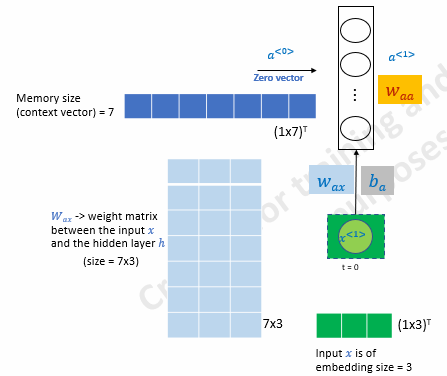

In [14]:
# Compile the model
model.compile(optimizer ='adam', 
              loss      ='binary_crossentropy', 
              metrics   =['accuracy'])

In [15]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


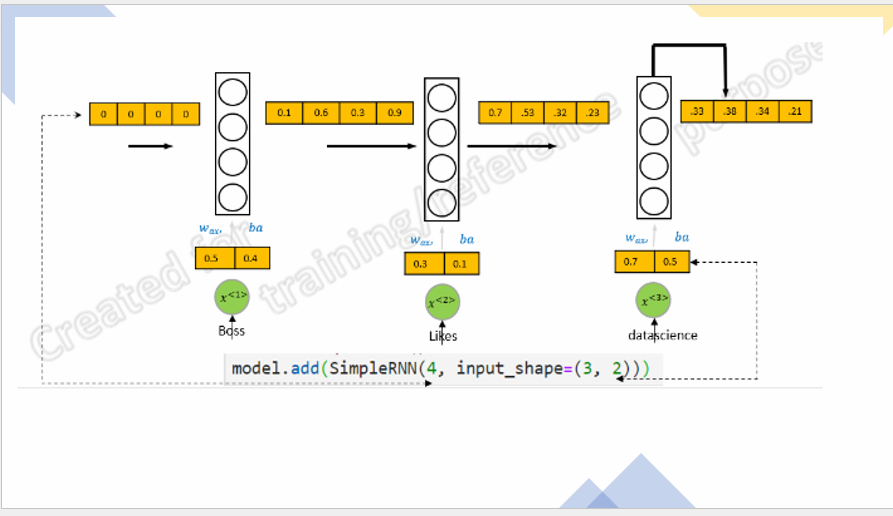

In [16]:
# Train the model
batch_size = 32
epochs     = 10

model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs    =epochs, 
          validation_split=0.1)

Epoch 1/10
29/29 [==============================] - 2s 16ms/step - loss: 0.4335 - accuracy: 0.8478 - val_loss: 0.2046 - val_accuracy: 0.9800
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.1814 - accuracy: 0.9633 - val_loss: 0.1157 - val_accuracy: 0.9800
Epoch 3/10
29/29 [==============================] - 0s 5ms/step - loss: 0.1602 - accuracy: 0.9633 - val_loss: 0.1042 - val_accuracy: 0.9800
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: 0.1511 - accuracy: 0.9633 - val_loss: 0.1017 - val_accuracy: 0.9800
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.1433 - accuracy: 0.9633 - val_loss: 0.0975 - val_accuracy: 0.9800
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: 0.1338 - accuracy: 0.9633 - val_loss: 0.0944 - val_accuracy: 0.9800
Epoch 7/10
29/29 [==============================] - 0s 6ms/step - loss: 0.1224 - accuracy: 0.9633 - val_loss: 0.0845 - val_accuracy: 0.9800
Epoch 8/10
29/29 [=

In [17]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

7/7 [==============================] - 0s 5ms/step - loss: 0.0734 - accuracy: 0.9800
Test loss: 0.0734, Test accuracy: 0.9800


#### Next 

- Text classification (sentiment analysis) on IMDB - movie review dataset